<a href="https://colab.research.google.com/github/KBRaghul/about-me/blob/main/CSE_D_9_Fraud_detection_roll_nos_(46_58_59_60).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_card.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,12,13,14,15,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.drop(['first','cc_num','trans_num','last','Unnamed: 0','lat', 'long','merch_lat','job','dob','trans_date_trans_time','city','merch_long','zip','street','city_pop','unix_time'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'is_fraud'], dtype='object')

In [ ]:
df.dtypes

merchant    object
category    object
amt         object
gender      object
state       object
is_fraud    object
dtype: object

In [ ]:
df = df.drop(df.index[[555719]], axis = 0)  # Rows indicies to drop
#df['cc_num'] = pd.to_numeric(df['cc_num'])
df['is_fraud'] = df['is_fraud'].astype(int)
df['amt'] = df.amt.astype(float)
df.dtypes


merchant     object
category     object
amt         float64
gender       object
state        object
is_fraud      int64
dtype: object

In [ ]:
df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [ ]:
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['is_fraud'] == 1]

#Randomly select 9651 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['is_fraud'] == 0].sample(n=9651,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])


In [ ]:
normalized_df.reset_index(inplace=True)
df = normalized_df.iloc[:,1:]
df

,merchant,category,amt,gender,state,is_fraud
0,fraud_Lynch-Wisozk,home,290.62,F,OK,1
1,fraud_Kris-Padberg,shopping_pos,841.98,M,OK,1
2,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,F,CA,1
3,fraud_Zulauf LLC,personal_care,18.60,M,TX,1
4,fraud_Rowe-Vandervort,grocery_net,12.55,F,IN,1
...,...,...,...,...,...,...
19297,fraud_Schmeler-Howe,personal_care,67.86,M,MD,0
19298,fraud_Reynolds-Schinner,misc_pos,1.44,F,KY,0
19299,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,F,IL,0
19300,fraud_Block-Hauck,travel,2.01,M,MI,0


In [ ]:
df_api=df

In [ ]:
df_api

,merchant,category,amt,gender,state,is_fraud
0,fraud_Lynch-Wisozk,home,290.62,F,OK,1
1,fraud_Kris-Padberg,shopping_pos,841.98,M,OK,1
2,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,F,CA,1
3,fraud_Zulauf LLC,personal_care,18.60,M,TX,1
4,fraud_Rowe-Vandervort,grocery_net,12.55,F,IN,1
...,...,...,...,...,...,...
19297,fraud_Schmeler-Howe,personal_care,67.86,M,MD,0
19298,fraud_Reynolds-Schinner,misc_pos,1.44,F,KY,0
19299,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,F,IL,0
19300,fraud_Block-Hauck,travel,2.01,M,MI,0


In [ ]:
df['gender']=df['gender'].map(lambda a : 0 if a == 'M' else 1)
## Male is 0 F is 1


In [ ]:
df.nunique()

merchant      693
category       14
amt         13963
gender          2
state          51
is_fraud        2
dtype: int64

In [ ]:
df

,merchant,category,amt,gender,state,is_fraud
0,fraud_Lynch-Wisozk,home,290.62,1,OK,1
1,fraud_Kris-Padberg,shopping_pos,841.98,0,OK,1
2,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,1,CA,1
3,fraud_Zulauf LLC,personal_care,18.60,0,TX,1
4,fraud_Rowe-Vandervort,grocery_net,12.55,1,IN,1
...,...,...,...,...,...,...
19297,fraud_Schmeler-Howe,personal_care,67.86,0,MD,0
19298,fraud_Reynolds-Schinner,misc_pos,1.44,1,KY,0
19299,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,1,IL,0
19300,fraud_Block-Hauck,travel,2.01,0,MI,0


In [ ]:
#df_api=df

In [ ]:
#df_api

In [ ]:
df.describe()

,amt,gender,is_fraud
count,19302.000000,19302.000000,19302.000000
mean,298.939574,0.526785,0.500000
std,371.766175,0.499295,0.500013
min,1.010000,0.000000,0.000000
25%,20.630000,0.000000,0.000000
50%,87.490000,1.000000,0.500000
75%,473.845000,1.000000,1.000000
max,4399.610000,1.000000,1.000000


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [ ]:
state=pd.get_dummies(df.state)
merged=pd.concat([df,state],axis='columns')
df=merged.drop(['state','OK'],axis=1)

In [ ]:
category=pd.get_dummies(df.category)
merged=pd.concat([df,category],axis='columns')
df=merged.drop(['category','home'],axis=1)
df.shape

(19302, 67)

In [ ]:
df['merchant'] = df['merchant'].astype(str)
df.dtypes

merchant          object
amt              float64
gender             int64
is_fraud           int64
AK                 uint8
                  ...   
misc_pos           uint8
personal_care      uint8
shopping_net       uint8
shopping_pos       uint8
travel             uint8
Length: 67, dtype: object

In [ ]:
df.merchant.value_counts().sort_values(ascending= False).head(60)

fraud_Kilback LLC                             90
fraud_Boyer PLC                               85
fraud_Rau and Sons                            82
fraud_Cormier LLC                             82
fraud_Schultz, Simonis and Little             80
fraud_Romaguera, Cruickshank and Greenholt    78
fraud_Doyle Ltd                               77
fraud_Kuhn LLC                                76
fraud_Kozey-Boehm                             75
fraud_Terry-Huel                              75
fraud_Huel, Hammes and Witting                73
fraud_Heathcote, Yost and Kertzmann           72
fraud_Goldner, Kovacek and Abbott             71
fraud_Stracke-Lemke                           71
fraud_Strosin-Cruickshank                     71
fraud_Koepp-Witting                           70
fraud_Moen, Reinger and Murphy                70
fraud_Kiehn-Emmerich                          69
fraud_Boyer-Reichert                          69
fraud_McDermott-Weimann                       68
fraud_Padberg-Welch 

In [ ]:
top_60= [x for x in df.merchant.value_counts().sort_values(ascending= False).head(60).index]

In [ ]:
for label in top_60:
  df[label] = np.where(df['merchant']==label,1,0)

In [ ]:
df.shape

(19302, 127)

In [ ]:
df.drop(['merchant'],axis=1,inplace=True)

In [ ]:
df

,amt,gender,is_fraud,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OR,...,fraud_Padberg-Welch,fraud_Kiehn Inc,"fraud_Schmeler, Bashirian and Price",fraud_Vandervort-Funk,fraud_Goyette Inc,fraud_Schumm PLC,fraud_Murray-Smitham,"fraud_Lockman, West and Runte",fraud_Fisher-Schowalter,fraud_Lemke-Gutmann,"fraud_Mosciski, Ziemann and Farrell",fraud_Lockman Ltd,fraud_Miller-Hauck,fraud_Kunze Inc,fraud_Heidenreich PLC,fraud_Gleason-Macejkovic,fraud_Kuhic LLC,"fraud_Gottlieb, Considine and Schultz","fraud_Langworth, Boehm and Gulgowski","fraud_Osinski, Ledner and Leuschke","fraud_Kovacek, Dibbert and Ondricka","fraud_Greenholt, O'Hara and Balistreri",fraud_Wolf Inc,"fraud_Mosciski, Gislason and Mertz",fraud_Kerluke-Abshire,"fraud_Labadie, Treutel and Bode",fraud_Rempel Inc,"fraud_Schoen, Kuphal and Nitzsche",fraud_Bradtke PLC,"fraud_Casper, Hand and Zulauf",fraud_Bailey-Morar,fraud_Heathcote LLC,fraud_Kutch and Sons,fraud_Price Inc,fraud_Hudson-Ratke,"fraud_Stanton, Jakubowski and Baumbach",fraud_Jast Ltd,fraud_Medhurst PLC,"fraud_Kuhic, Bins and Pfeffer",fraud_Schmidt and Sons
0,290.62,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,841.98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,932.02,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18.60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12.55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,67.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19298,1.44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19299,1.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19300,2.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
col = df.pop('is_fraud')
df.insert(125,'is_fraud',col,allow_duplicates=False)
df

,amt,gender,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OR,PA,...,fraud_Kiehn Inc,"fraud_Schmeler, Bashirian and Price",fraud_Vandervort-Funk,fraud_Goyette Inc,fraud_Schumm PLC,fraud_Murray-Smitham,"fraud_Lockman, West and Runte",fraud_Fisher-Schowalter,fraud_Lemke-Gutmann,"fraud_Mosciski, Ziemann and Farrell",fraud_Lockman Ltd,fraud_Miller-Hauck,fraud_Kunze Inc,fraud_Heidenreich PLC,fraud_Gleason-Macejkovic,fraud_Kuhic LLC,"fraud_Gottlieb, Considine and Schultz","fraud_Langworth, Boehm and Gulgowski","fraud_Osinski, Ledner and Leuschke","fraud_Kovacek, Dibbert and Ondricka","fraud_Greenholt, O'Hara and Balistreri",fraud_Wolf Inc,"fraud_Mosciski, Gislason and Mertz",fraud_Kerluke-Abshire,"fraud_Labadie, Treutel and Bode",fraud_Rempel Inc,"fraud_Schoen, Kuphal and Nitzsche",fraud_Bradtke PLC,"fraud_Casper, Hand and Zulauf",fraud_Bailey-Morar,fraud_Heathcote LLC,fraud_Kutch and Sons,fraud_Price Inc,fraud_Hudson-Ratke,"fraud_Stanton, Jakubowski and Baumbach",fraud_Jast Ltd,fraud_Medhurst PLC,"fraud_Kuhic, Bins and Pfeffer",fraud_Schmidt and Sons,is_fraud
0,290.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,841.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,932.02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,18.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,12.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,67.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19298,1.44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19299,1.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19300,2.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#from sklearn.preprocessing import minmax_scale
#df[['amt']] = minmax_scale(df[['amt']])

In [ ]:
#df

# **TRAIN & Split**

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from  sklearn.model_selection import train_test_split
x_train ,x_test , y_train, y_test = train_test_split (x,y,test_size=0.2,random_state=1)

In [ ]:
print(x_train)

[[311.93   0.     0.   ...   0.     0.     0.  ]
 [434.66   1.     0.   ...   0.     0.     0.  ]
 [ 10.23   1.     0.   ...   0.     0.     0.  ]
 ...
 [933.06   0.     0.   ...   0.     0.     0.  ]
 [ 92.1    1.     0.   ...   0.     0.     0.  ]
 [ 10.92   1.     0.   ...   0.     0.     0.  ]]


In [ ]:
print(y_train)

[1 1 1 ... 1 0 1]


# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train[:,0:1]= sc.fit_transform(x_train[:,0:1])
x_test[:,0:1]= sc.transform(x_test[:,0:1])

In [ ]:
x_train.shape

(15441, 125)

# **SVM**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1818   72]
 [ 464 1507]]


0.8611758611758612

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1890
           1       0.95      0.76      0.85      1971

    accuracy                           0.86      3861
   macro avg       0.88      0.86      0.86      3861
weighted avg       0.88      0.86      0.86      3861



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1801   89]
 [  97 1874]]


0.9518259518259519

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1890
           1       0.95      0.95      0.95      1971

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1800   90]
 [ 109 1862]]


0.9484589484589485

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1890
           1       0.95      0.94      0.95      1971

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train_kpca = kpca.fit_transform(x_train)
x_test_kpca = kpca.transform(x_test)

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_kpca, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test_kpca)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1842   48]
 [ 546 1425]]


0.8461538461538461

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1890
           1       0.97      0.72      0.83      1971

    accuracy                           0.85      3861
   macro avg       0.87      0.85      0.84      3861
weighted avg       0.87      0.85      0.84      3861



# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train_kpca, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test_kpca)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1705  185]
 [ 179 1792]]


0.9057239057239057

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1890
           1       0.91      0.91      0.91      1971

    accuracy                           0.91      3861
   macro avg       0.91      0.91      0.91      3861
weighted avg       0.91      0.91      0.91      3861



# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state = 0)
regressor.fit(x_train_kpca,y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = regressor.predict(x_test_kpca)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1817   73]
 [ 471 1500]]


0.8591038591038591

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1890
           1       0.95      0.76      0.85      1971

    accuracy                           0.86      3861
   macro avg       0.87      0.86      0.86      3861
weighted avg       0.88      0.86      0.86      3861



# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1812   78]
 [ 125 1846]]


0.9474229474229474

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.91 %
Standard Deviation: 0.62 %


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1890
           1       0.96      0.94      0.95      1971

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



# **Deep Learning**

**ANN**

In [ ]:
import tensorflow as tf

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 400)

Epoch 1/400
483/483 [==============================] - 2s 3ms/step - loss: 0.5959 - accuracy: 0.6314
Epoch 2/400
483/483 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8585
Epoch 3/400
483/483 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8610
Epoch 4/400
483/483 [==============================] - 1s 3ms/step - loss: 0.3474 - accuracy: 0.8617
Epoch 5/400
483/483 [==============================] - 1s 2ms/step - loss: 0.3459 - accuracy: 0.8619
Epoch 6/400
483/483 [==============================] - 1s 2ms/step - loss: 0.3451 - accuracy: 0.8624
Epoch 7/400
483/483 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8628
Epoch 8/400
483/483 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8620
Epoch 9/400
483/483 [==============================] - 1s 2ms/step - loss: 0.3465 - accuracy: 0.8615
Epoch 10/400
483/483 [==============================] - 1s 3ms/step - loss: 0.3450 - accura

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1864   26]
 [ 468 1503]]


0.8720538720538721

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      1890
           1       0.98      0.76      0.86      1971

    accuracy                           0.87      3861
   macro avg       0.89      0.87      0.87      3861
weighted avg       0.89      0.87      0.87      3861



# **Apriori**

In [ ]:
!pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=85f3849f6c77031b178cf14bc405b5fc0b4b7b2fd1eb33fca99282ae869389a8
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
df_api
transactions_api=[]
for i in range(0, 19302):
  transactions_api.append([str(df_api.values[i,j]) for j in range(0, 6)])

In [ ]:
rules = apriori(transactions = transactions_api, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'fraud_Auer-Mosciski', 'grocery_pos'}), support=0.00305667806444928, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fraud_Auer-Mosciski'}), items_add=frozenset({'grocery_pos'}), confidence=1.0, lift=6.135410044500953)]),
 RelationRecord(items=frozenset({'fraud_Bailey-Morar', 'grocery_pos'}), support=0.003108486167236556, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fraud_Bailey-Morar'}), items_add=frozenset({'grocery_pos'}), confidence=1.0, lift=6.135410044500953)]),
 RelationRecord(items=frozenset({'shopping_net', 'fraud_Boyer PLC'}), support=0.0034193347839602114, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fraud_Boyer PLC'}), items_add=frozenset({'shopping_net'}), confidence=0.776470588235294, lift=5.087384689109859)]),
 RelationRecord(items=frozenset({'fraud_Boyer-Reichert', 'shopping_net'}), support=0.003574759092322039, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fraud_Boyer-Reichert'}), 

In [ ]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,fraud_Auer-Mosciski,grocery_pos,0.003057,1.000000,6.135410
1,fraud_Bailey-Morar,grocery_pos,0.003108,1.000000,6.135410
2,fraud_Boyer PLC,shopping_net,0.003419,0.776471,5.087385
3,fraud_Boyer-Reichert,shopping_net,0.003575,1.000000,6.551935
4,fraud_Bradtke PLC,grocery_pos,0.003160,1.000000,6.135410
...,...,...,...,...,...
61,fraud_Stracke-Lemke,grocery_pos,0.003678,1.000000,6.135410
62,fraud_Strosin-Cruickshank,grocery_pos,0.003678,1.000000,6.135410
63,fraud_Terry-Huel,shopping_net,0.003886,1.000000,6.551935
64,fraud_Vandervort-Funk,grocery_pos,0.003523,1.000000,6.135410


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.figure
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_card.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,12,13,14,15,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0.0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.9864,-81.2007,0
1,1.0,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.436,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.4505,-109.96,0
2,2.0,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.4958,-74.1961,0
3,3.0,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.8124,-80.8831,0
4,4.0,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.017,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.9591,-85.8847,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852390,1296670.0,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,84735,37.7175,-112.478,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.8413,-111.691,0
1852391,1296671.0,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.7,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.9069,-78.2465,0
1852392,1296672.0,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,88325,32.9396,-105.819,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.6195,-105.131,0
1852393,1296673.0,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.9,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.541,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.7889,-103.241,0


In [ ]:
df2=df[df['is_fraud']==1]

In [ ]:
df.shape

(1852395, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852395 entries, 0 to 1852394
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             float64
 1   trans_date_trans_time  object 
 2   cc_num                 object 
 3   merchant               object 
 4   category               object 
 5   amt                    object 
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    object 
 13  lat                    object 
 14  long                   object 
 15  city_pop               object 
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              object 
 20  merch_lat              object 
 21  merch_long             object 
 22  is_fraud          

## **Pre Processing**

In [ ]:
df.drop(['first','last','Unnamed: 0','lat', 'long','merch_lat','merch_long','zip','street','city_pop','unix_time'],axis=1,inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,dob,trans_num,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1852390,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,0
1852391,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.7,M,Tuscarora,MD,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,0
1852392,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,0
1852393,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.9,M,Manderson,SD,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,0


In [ ]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
job                      0
dob                      0
trans_num                0
is_fraud                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)
print("No. of Null Values : ",df.isna().sum().sum())

No. of Null Values :  0


In [ ]:
duplicates = len(df[df.duplicated()])
print("The No. of Duplicates :  ",duplicates)

The No. of Duplicates :   0


In [ ]:
df.dtypes

trans_date_trans_time    object
cc_num                   object
merchant                 object
category                 object
amt                      object
gender                   object
city                     object
state                    object
job                      object
dob                      object
trans_num                object
is_fraud                 object
dtype: object

In [ ]:
df = df.drop(df.index[[555719]], axis = 0)  # Rows indicies to drop

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['cc_num'] = df.cc_num.astype(int)
df['is_fraud'] = df['is_fraud'].astype(int)
df['amt'] = df.amt.astype(float)
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
gender                           object
city                             object
state                            object
job                              object
dob                              object
trans_num                        object
is_fraud                          int64
dtype: object

In [ ]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
gender                         2
city                         906
state                         51
job                          497
dob                          984
trans_num                1852394
is_fraud                       2
dtype: int64

In [ ]:
fraud_count = df[df['is_fraud']==1]['is_fraud'].count()
non_fraud_count = df[df['is_fraud']==0]['is_fraud'].count()

print("No. of Fraud Transactions : ",fraud_count)
print("No. of Non-Fraud Transactions : ",non_fraud_count)

No. of Fraud Transactions :  9651
No. of Non-Fraud Transactions :  1842743


###**UnderSampling**

In [ ]:
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['is_fraud'] == 1]

#Randomly select 9651 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['is_fraud'] == 0].sample(n=9651,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])


In [ ]:
normalized_df.reset_index(inplace=True)
normalized_df = normalized_df.iloc[:,1:]
normalized_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,dob,trans_num,is_fraud
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,home,290.62,F,Clayton,OK,Occupational psychologist,1972-01-20,78db60d9a26e81e0a29101476344a1f4,1
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,shopping_pos,841.98,M,Tryon,OK,"Psychotherapist, child",1944-11-11,a69085dd960db4c2d5db5ed3e47a2994,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,F,Los Angeles,CA,"Journalist, newspaper",1959-05-30,1d7c224514e3853551dac61b8da59003,1
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,personal_care,18.60,M,Desdemona,TX,Clothing/textile technologist,1978-08-08,4da6262bf9ad6344ae2f596dbf1210fa,1
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,grocery_net,12.55,F,Central,IN,Counsellor,1955-01-05,ae2596de1d971bb90b0c2e8ea276f46e,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,personal_care,67.86,M,Kensington,MD,Operations geologist,1976-09-08,7f391fe225051e614c695f15ba9325f2,0
19298,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,misc_pos,1.44,F,Smiths Grove,KY,"Therapist, sports",1999-06-06,e1bc5ef8ecf63a067d4356b7154c28fa,0
19299,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,F,Loami,IL,English as a foreign language teacher,1991-04-22,8b48a4302df20c779771429c71c9a2d0,0
19300,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,travel,2.01,M,Oxford,MI,Agricultural consultant,1960-01-20,03d8f611ae2edd4c2bc3f5a51e87ef21,0


In [ ]:
normalized_df['dob'] = pd.to_datetime(df['dob'])
normalized_df['age'] = np.round((normalized_df['trans_date_trans_time']- normalized_df['dob'])/np.timedelta64(1,'Y')) ##found age from transaction time to dob
normalized_df = normalized_df[['trans_date_trans_time','cc_num','merchant','category','amt','gender','city','state','job','dob','age','trans_num','is_fraud']]
normalized_df.drop(['dob'],axis=1,inplace=True)
normalized_df['age'] = normalized_df.age.astype(int)
normalized_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,age,trans_num,is_fraud
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,home,290.62,F,Clayton,OK,Occupational psychologist,52,78db60d9a26e81e0a29101476344a1f4,1
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,shopping_pos,841.98,M,Tryon,OK,"Psychotherapist, child",30,a69085dd960db4c2d5db5ed3e47a2994,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,F,Los Angeles,CA,"Journalist, newspaper",49,1d7c224514e3853551dac61b8da59003,1
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,personal_care,18.60,M,Desdemona,TX,Clothing/textile technologist,33,4da6262bf9ad6344ae2f596dbf1210fa,1
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,grocery_net,12.55,F,Central,IN,Counsellor,65,ae2596de1d971bb90b0c2e8ea276f46e,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,personal_care,67.86,M,Kensington,MD,Operations geologist,80,7f391fe225051e614c695f15ba9325f2,0
19298,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,misc_pos,1.44,F,Smiths Grove,KY,"Therapist, sports",39,e1bc5ef8ecf63a067d4356b7154c28fa,0
19299,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,F,Loami,IL,English as a foreign language teacher,20,8b48a4302df20c779771429c71c9a2d0,0
19300,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,travel,2.01,M,Oxford,MI,Agricultural consultant,76,03d8f611ae2edd4c2bc3f5a51e87ef21,0


In [ ]:
fraud_df.reset_index(inplace=True)
fraud_df = fraud_df.iloc[:,1:]
fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,dob,trans_num,is_fraud
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,home,290.62,F,Clayton,OK,Occupational psychologist,1972-01-20,78db60d9a26e81e0a29101476344a1f4,1
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,shopping_pos,841.98,M,Tryon,OK,"Psychotherapist, child",1944-11-11,a69085dd960db4c2d5db5ed3e47a2994,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,F,Los Angeles,CA,"Journalist, newspaper",1959-05-30,1d7c224514e3853551dac61b8da59003,1
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,personal_care,18.60,M,Desdemona,TX,Clothing/textile technologist,1978-08-08,4da6262bf9ad6344ae2f596dbf1210fa,1
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,grocery_net,12.55,F,Central,IN,Counsellor,1955-01-05,ae2596de1d971bb90b0c2e8ea276f46e,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9646,2019-02-11 22:11:18,347073228412010,"fraud_Jones, Sawayn and Romaguera",misc_net,828.73,M,Alva,WY,"Administrator, local government",1973-05-16,2564cc16d7050cb782b9856c0fcf3aaa,1
9647,2019-03-25 23:46:27,4585132874641,fraud_Altenwerth-Kilback,home,270.28,F,Utica,MO,Land/geomatics surveyor,1972-04-18,588f636a2f99207d4d6c94626444e45e,1
9648,2020-05-12 16:31:36,4452366298769043,fraud_Nader-Maggio,personal_care,21.46,F,Blooming Grove,TX,Financial adviser,1978-03-04,c884b417e738f152cf1d24b855a056e1,1
9649,2019-02-12 23:42:38,3520550088202337,fraud_Beer-Jast,kids_pets,20.54,M,Hovland,MN,Freight forwarder,2001-07-05,71dc3f62c15e9c17d7bad377a125fe7c,1


In [ ]:
non_fraud_df.reset_index(inplace=True)
non_fraud_df = non_fraud_df.iloc[:,1:]
non_fraud_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,job,dob,trans_num,is_fraud
0,2020-06-29 18:08:35,30518206766474,"fraud_Weimann, Kuhic and Beahan",shopping_pos,7.97,F,Matthews,MO,Aeronautical engineer,1979-01-26,e1963465a5a822f376f172685c0ae96f,0
1,2020-08-18 15:35:41,213173753804333,fraud_Erdman-Ebert,personal_care,92.69,M,North Judson,IN,"Doctor, general practice",1959-10-07,95994dfc02d67f9cb8752f1afdc18c51,0
2,2019-11-20 00:26:16,3523898249167098,"fraud_Stroman, Hudson and Erdman",gas_transport,76.09,M,Bronx,NY,"Therapist, drama",1990-11-09,20f28564ceab72312950b8d9fcde55fa,0
3,2020-10-24 05:07:44,4716561796955522,fraud_Parisian and Sons,gas_transport,59.08,F,Heart Butte,MT,Water engineer,1972-05-04,7e1a93edb8e105572f31000c5be72110,0
4,2019-03-13 11:40:16,4536996888716062123,"fraud_Rippin, Kub and Mann",misc_net,9.38,M,Espanola,NM,Historic buildings inspector/conservation officer,1972-07-18,652e3e325a5941ba1f02245e0fa05e5e,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9646,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,personal_care,67.86,M,Kensington,MD,Operations geologist,1976-09-08,7f391fe225051e614c695f15ba9325f2,0
9647,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,misc_pos,1.44,F,Smiths Grove,KY,"Therapist, sports",1999-06-06,e1bc5ef8ecf63a067d4356b7154c28fa,0
9648,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,F,Loami,IL,English as a foreign language teacher,1991-04-22,8b48a4302df20c779771429c71c9a2d0,0
9649,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,travel,2.01,M,Oxford,MI,Agricultural consultant,1960-01-20,03d8f611ae2edd4c2bc3f5a51e87ef21,0


In [ ]:
titles = list(normalized_df.columns)
titles
titles[5] , titles[8] = titles[8] , titles[5]
titles[4] , titles[10] = titles[10] , titles[4]
titles[3] , titles[7] = titles[7] , titles[3]
titles[3] , titles[5] = titles[5] , titles[3]
normalized_df=normalized_df[titles]
normalized_df

,trans_date_trans_time,cc_num,merchant,job,trans_num,state,city,category,gender,age,amt,is_fraud
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,Occupational psychologist,78db60d9a26e81e0a29101476344a1f4,OK,Clayton,home,F,52,290.62,1
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,"Psychotherapist, child",a69085dd960db4c2d5db5ed3e47a2994,OK,Tryon,shopping_pos,M,30,841.98,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas","Journalist, newspaper",1d7c224514e3853551dac61b8da59003,CA,Los Angeles,shopping_pos,F,49,932.02,1
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,Clothing/textile technologist,4da6262bf9ad6344ae2f596dbf1210fa,TX,Desdemona,personal_care,M,33,18.60,1
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,Counsellor,ae2596de1d971bb90b0c2e8ea276f46e,IN,Central,grocery_net,F,65,12.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,Operations geologist,7f391fe225051e614c695f15ba9325f2,MD,Kensington,personal_care,M,80,67.86,0
19298,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,"Therapist, sports",e1bc5ef8ecf63a067d4356b7154c28fa,KY,Smiths Grove,misc_pos,F,39,1.44,0
19299,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",English as a foreign language teacher,8b48a4302df20c779771429c71c9a2d0,IL,Loami,food_dining,F,20,1.45,0
19300,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,Agricultural consultant,03d8f611ae2edd4c2bc3f5a51e87ef21,MI,Oxford,travel,M,76,2.01,0


###**One hot encoding**

In [ ]:
gender_data=pd.get_dummies(normalized_df.gender)
merged=pd.concat([normalized_df,gender_data],axis='columns')
final=merged.drop(['gender','F'],axis=1)
final

,trans_date_trans_time,cc_num,merchant,job,trans_num,state,city,category,age,amt,is_fraud,M
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,Occupational psychologist,78db60d9a26e81e0a29101476344a1f4,OK,Clayton,home,52,290.62,1,0
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,"Psychotherapist, child",a69085dd960db4c2d5db5ed3e47a2994,OK,Tryon,shopping_pos,30,841.98,1,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas","Journalist, newspaper",1d7c224514e3853551dac61b8da59003,CA,Los Angeles,shopping_pos,49,932.02,1,0
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,Clothing/textile technologist,4da6262bf9ad6344ae2f596dbf1210fa,TX,Desdemona,personal_care,33,18.60,1,1
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,Counsellor,ae2596de1d971bb90b0c2e8ea276f46e,IN,Central,grocery_net,65,12.55,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,Operations geologist,7f391fe225051e614c695f15ba9325f2,MD,Kensington,personal_care,80,67.86,0,1
19298,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,"Therapist, sports",e1bc5ef8ecf63a067d4356b7154c28fa,KY,Smiths Grove,misc_pos,39,1.44,0,0
19299,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",English as a foreign language teacher,8b48a4302df20c779771429c71c9a2d0,IL,Loami,food_dining,20,1.45,0,0
19300,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,Agricultural consultant,03d8f611ae2edd4c2bc3f5a51e87ef21,MI,Oxford,travel,76,2.01,0,1


In [ ]:
category_data=pd.get_dummies(final.category)
category_data
merged1=pd.concat([final,category_data],axis='columns')
final1=merged1.drop(['travel','category'],axis=1)
final1

,trans_date_trans_time,cc_num,merchant,job,trans_num,state,city,age,amt,is_fraud,M,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,Occupational psychologist,78db60d9a26e81e0a29101476344a1f4,OK,Clayton,52,290.62,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,"Psychotherapist, child",a69085dd960db4c2d5db5ed3e47a2994,OK,Tryon,30,841.98,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas","Journalist, newspaper",1d7c224514e3853551dac61b8da59003,CA,Los Angeles,49,932.02,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,Clothing/textile technologist,4da6262bf9ad6344ae2f596dbf1210fa,TX,Desdemona,33,18.60,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,Counsellor,ae2596de1d971bb90b0c2e8ea276f46e,IN,Central,65,12.55,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,Operations geologist,7f391fe225051e614c695f15ba9325f2,MD,Kensington,80,67.86,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
19298,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,"Therapist, sports",e1bc5ef8ecf63a067d4356b7154c28fa,KY,Smiths Grove,39,1.44,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19299,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",English as a foreign language teacher,8b48a4302df20c779771429c71c9a2d0,IL,Loami,20,1.45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19300,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,Agricultural consultant,03d8f611ae2edd4c2bc3f5a51e87ef21,MI,Oxford,76,2.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
col = final1.pop('is_fraud')

In [ ]:
final1.insert(23,'is_fraud',col,allow_duplicates=False)

In [ ]:
final1

,trans_date_trans_time,cc_num,merchant,job,trans_num,state,city,age,amt,M,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,is_fraud
0,2019-12-12 22:15:37,4450831335606294,fraud_Lynch-Wisozk,Occupational psychologist,78db60d9a26e81e0a29101476344a1f4,OK,Clayton,52,290.62,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2019-07-22 23:42:33,4917187576956394,fraud_Kris-Padberg,"Psychotherapist, child",a69085dd960db4c2d5db5ed3e47a2994,OK,Tryon,30,841.98,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,2020-02-28 18:06:28,6011393492413821,"fraud_Baumbach, Strosin and Nicolas","Journalist, newspaper",1d7c224514e3853551dac61b8da59003,CA,Los Angeles,49,932.02,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2020-10-06 22:38:03,581508178315,fraud_Zulauf LLC,Clothing/textile technologist,4da6262bf9ad6344ae2f596dbf1210fa,TX,Desdemona,33,18.60,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2020-11-14 05:34:30,30487648872433,fraud_Rowe-Vandervort,Counsellor,ae2596de1d971bb90b0c2e8ea276f46e,IN,Central,65,12.55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2019-11-07 12:15:09,3502088871723054,fraud_Schmeler-Howe,Operations geologist,7f391fe225051e614c695f15ba9325f2,MD,Kensington,80,67.86,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
19298,2019-10-11 17:00:16,4653879239169997,fraud_Reynolds-Schinner,"Therapist, sports",e1bc5ef8ecf63a067d4356b7154c28fa,KY,Smiths Grove,39,1.44,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19299,2019-09-05 23:19:23,180047222886866,"fraud_Schneider, Hayes and Nikolaus",English as a foreign language teacher,8b48a4302df20c779771429c71c9a2d0,IL,Loami,20,1.45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
19300,2019-12-08 19:40:45,4220345354880,fraud_Block-Hauck,Agricultural consultant,03d8f611ae2edd4c2bc3f5a51e87ef21,MI,Oxford,76,2.01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###**Feature Scaling**

In [ ]:
x=final1.iloc[:,:-1].values
y=final1.iloc[:,-1].values

In [ ]:
print(x)
print('\n')
print(y)

[[Timestamp('2019-12-12 22:15:37') 4450831335606294 'fraud_Lynch-Wisozk'
  ... 0 0 0]
 [Timestamp('2019-07-22 23:42:33') 4917187576956394 'fraud_Kris-Padberg'
  ... 0 0 1]
 [Timestamp('2020-02-28 18:06:28') 6011393492413821
  'fraud_Baumbach, Strosin and Nicolas' ... 0 0 1]
 ...
 [Timestamp('2019-09-05 23:19:23') 180047222886866
  'fraud_Schneider, Hayes and Nikolaus' ... 0 0 0]
 [Timestamp('2019-12-08 19:40:45') 4220345354880 'fraud_Block-Hauck' ...
  0 0 0]
 [Timestamp('2019-05-30 15:18:55') 2248735346244816
  'fraud_Gutmann, McLaughlin and Wiza' ... 0 0 0]]


[1 1 1 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train, y_test = train_test_split (x,y,test_size=0.2,random_state=1)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train[:,7:9]= sc.fit_transform(x_train[:,7:9])
x_test[:,7:9]= sc.transform(x_test[:,7:9])

## **Visualization**

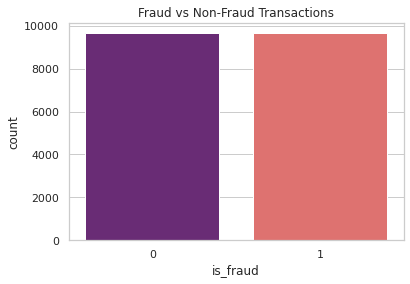

In [ ]:
sb.set_theme(style='whitegrid')
sb.countplot(x='is_fraud', data=normalized_df,palette='magma')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

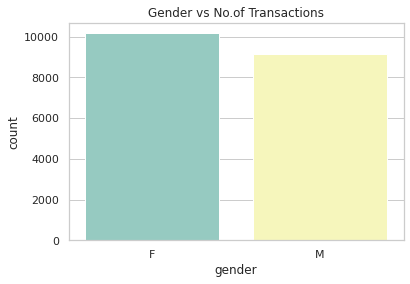

In [ ]:
sb.set_theme(style='whitegrid')
sb.countplot(x='gender', data=normalized_df,palette='Set3')
plt.title('Gender vs No.of Transactions')
plt.show()

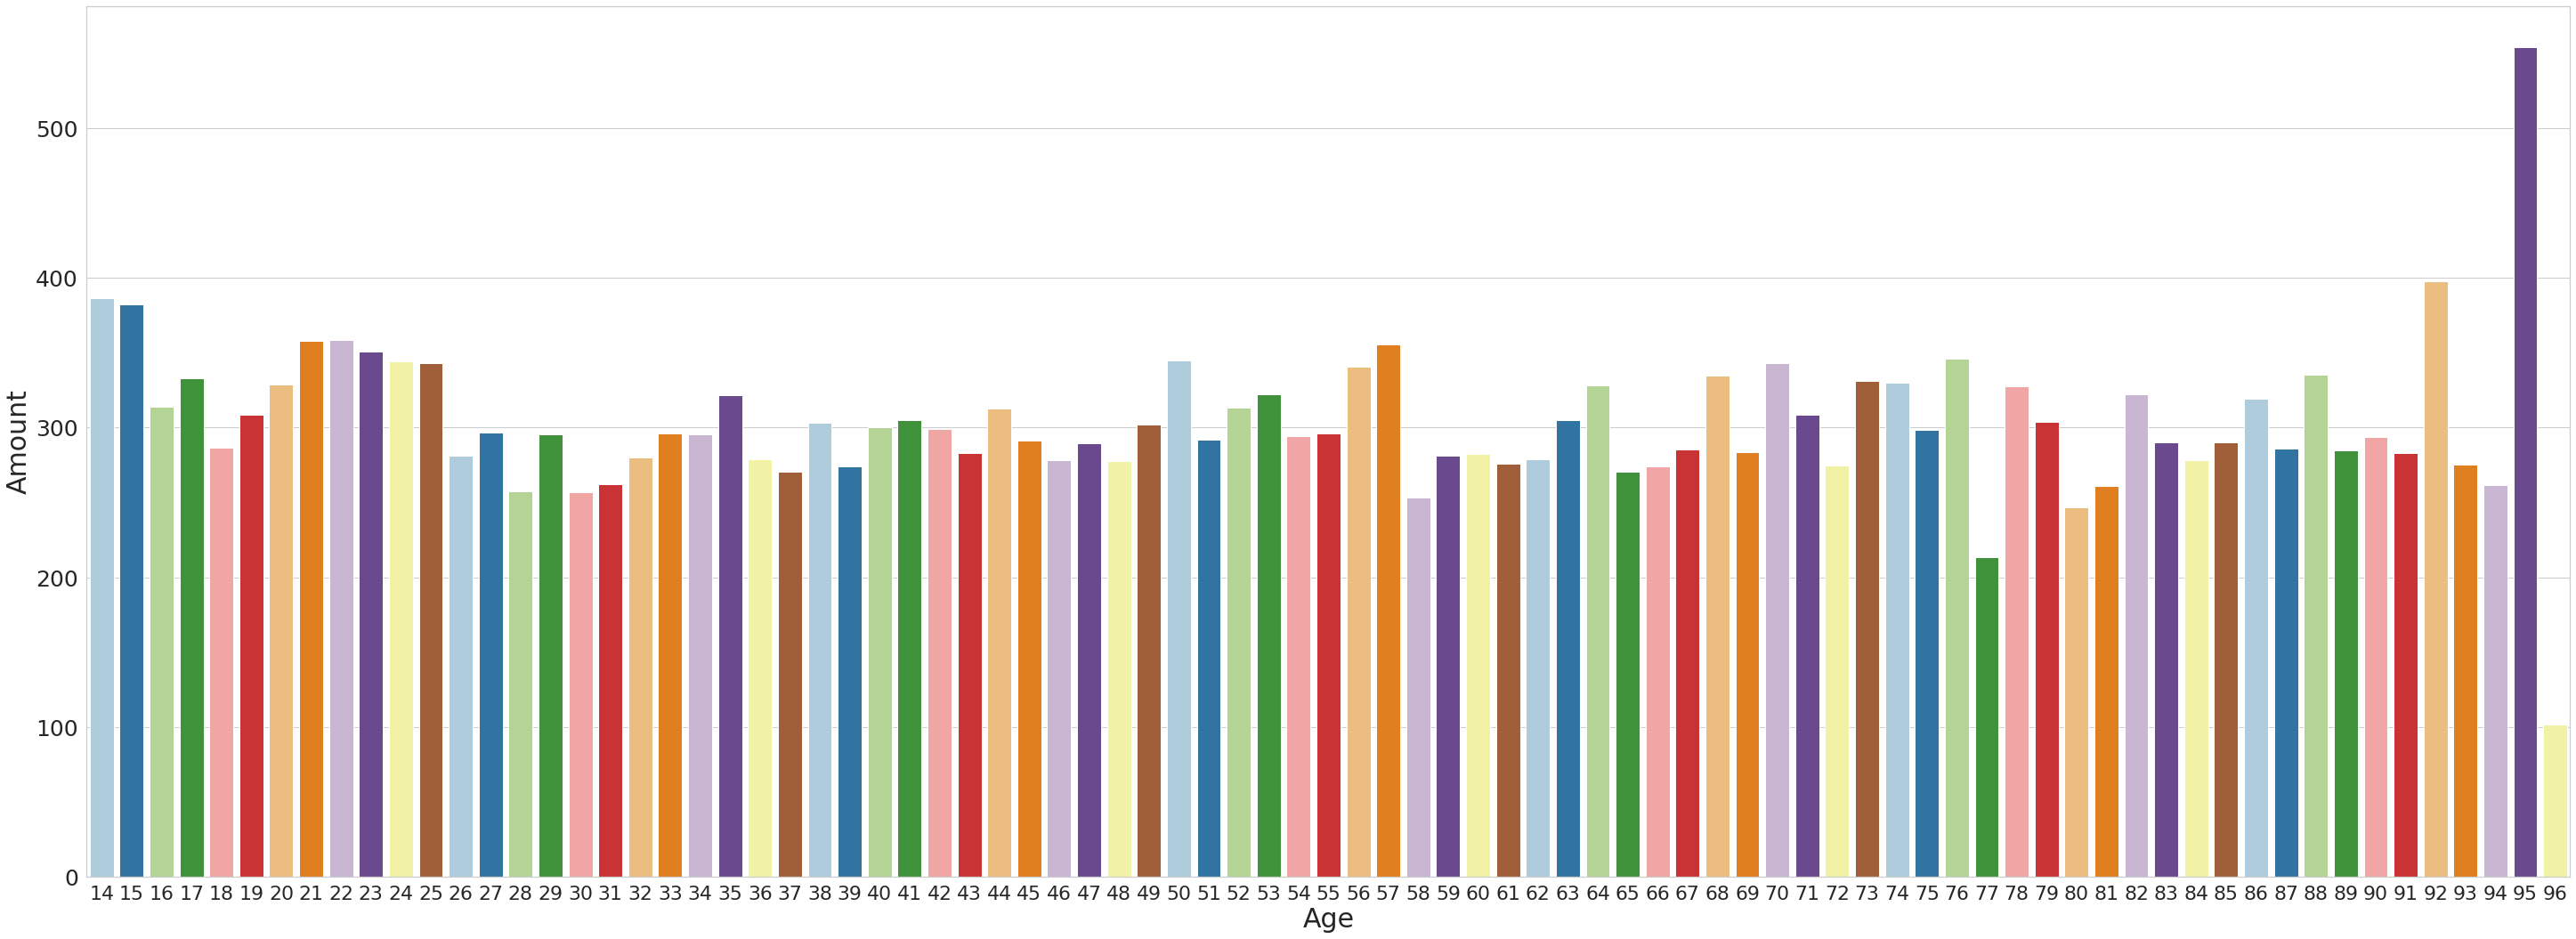

In [ ]:
from matplotlib.pyplot import  figure
figure(figsize=(50,18), facecolor='w', edgecolor='r')
sb.barplot(x=normalized_df['age'],y=normalized_df['amt'],palette='Paired',ci=None)
plt.xticks(fontsize=22)
plt.yticks(fontsize=25)
plt.xlabel('Age',fontsize=30)
plt.ylabel('Amount', fontsize=30)
plt.show()

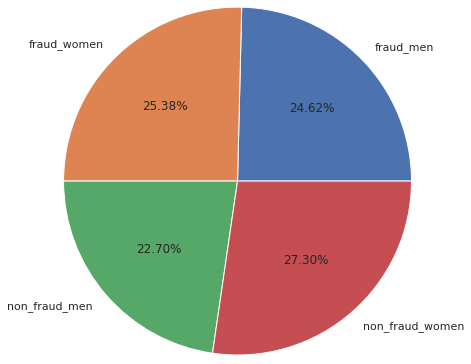

In [ ]:
fraud_men = normalized_df[(normalized_df['gender'] == 'M') & (normalized_df['is_fraud'] == 1)]
fraud_men=(int(len(fraud_men)))
fraud_women = normalized_df[(normalized_df['gender'] == 'F') & (normalized_df['is_fraud'] == 1)]
fraud_women=(int(len(fraud_women)))
non_fraud_men = normalized_df[(normalized_df['gender'] == 'M') & (normalized_df['is_fraud'] == 0)]
non_fraud_men=(int(len(non_fraud_men)))
non_fraud_women = normalized_df[(normalized_df['gender'] == 'F') & (normalized_df['is_fraud'] == 0)]
non_fraud_women=(int(len(non_fraud_women)))

pie_val=[fraud_men,fraud_women,non_fraud_men,non_fraud_women]
pie_lab=["fraud_men","fraud_women","non_fraud_men","non_fraud_women"]
plt.axis("equal")

plt.pie(pie_val,labels=pie_lab,radius=2, autopct='%1.2f%%')
plt.show()

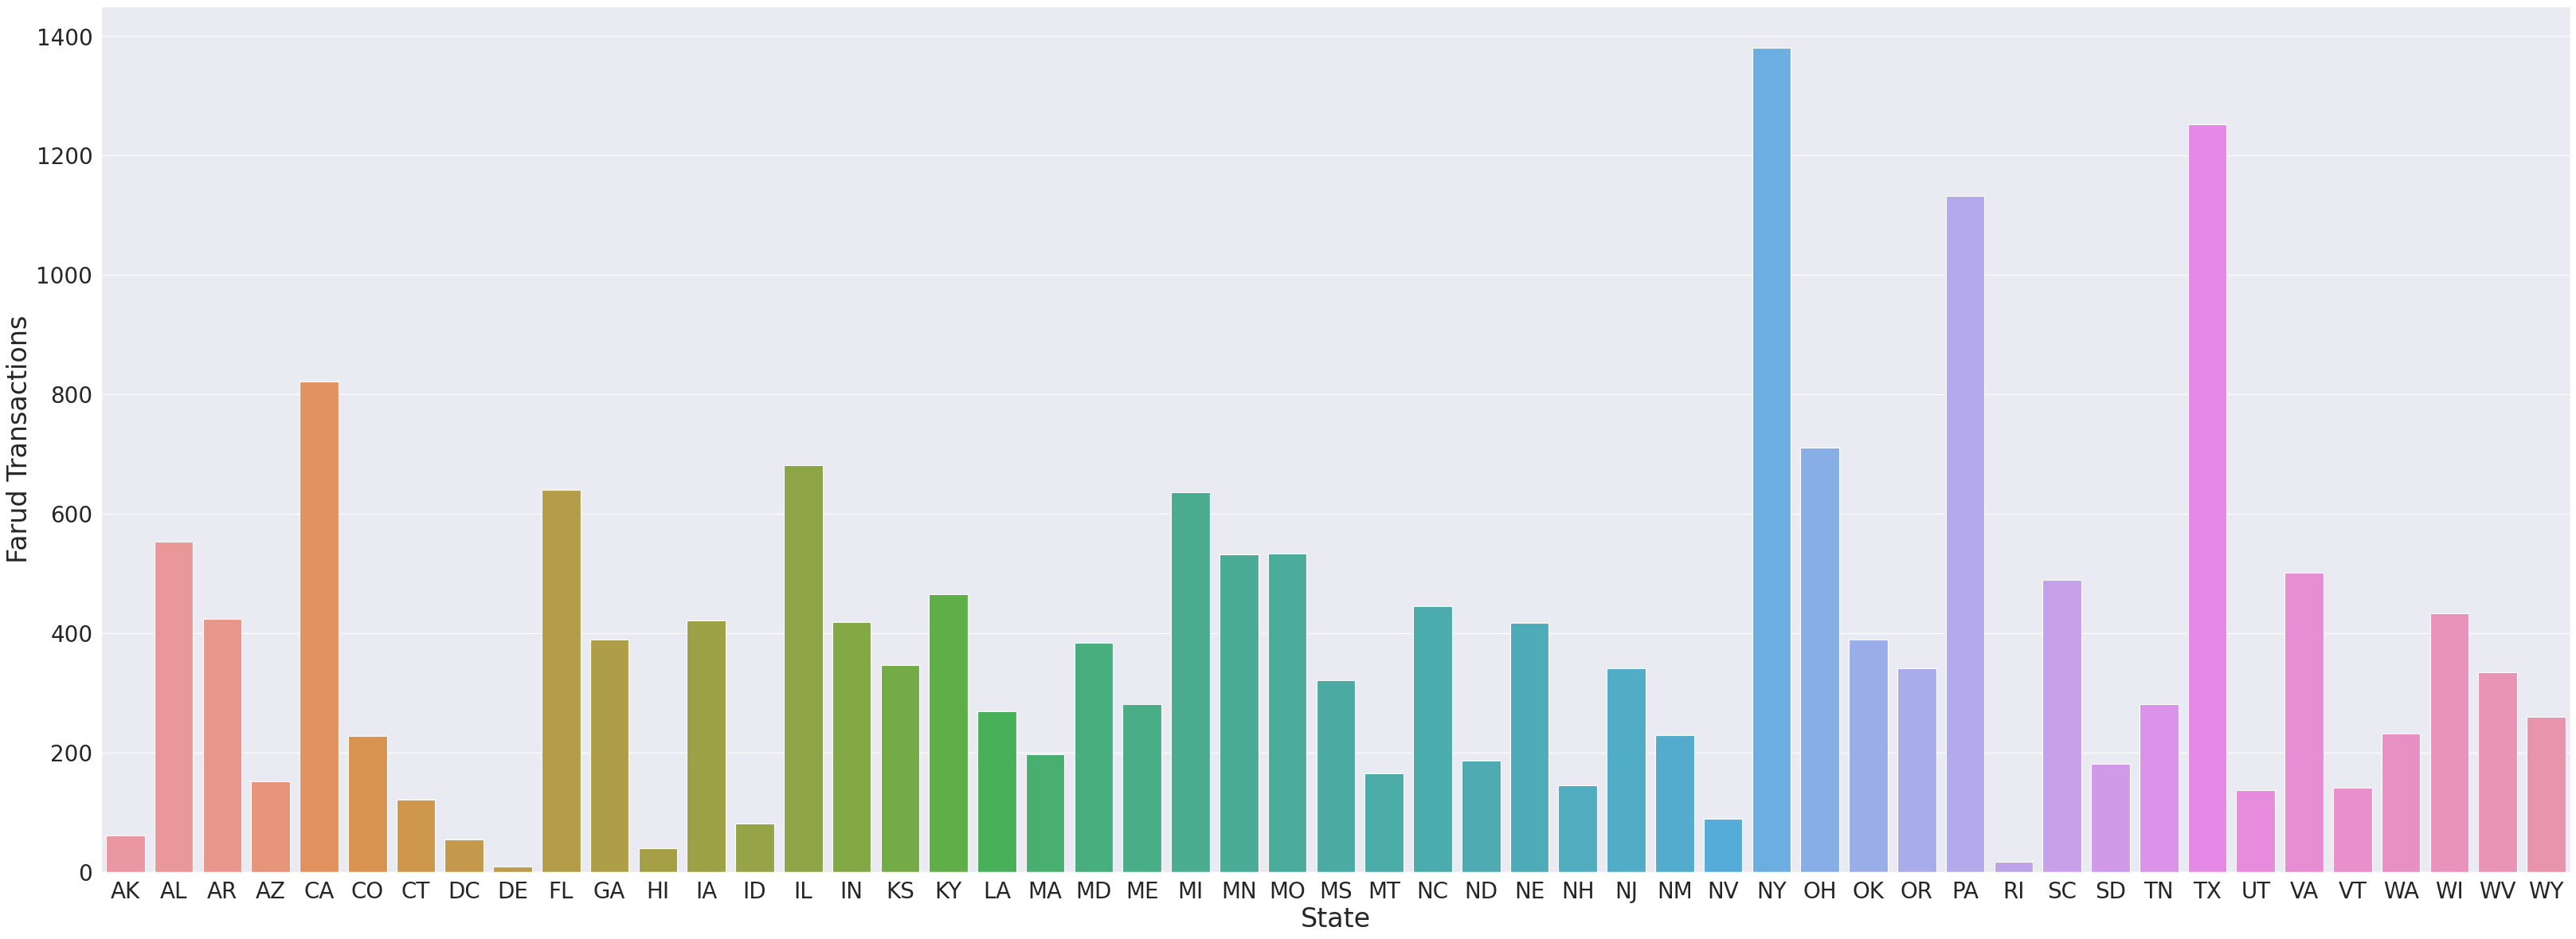

In [ ]:
data_state = normalized_df[['state','is_fraud']].groupby(['state']).count().reset_index()
data_state.columns = ['state','is_fraud_count']
data_state


from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
figure(num=None, figsize=(50,18), dpi=80, facecolor='w', edgecolor='r')
p=sns.barplot(x="state", y = "is_fraud_count" , data = data_state)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('State',fontsize=30)
plt.ylabel('Farud Transactions', fontsize=30)
plt.show()

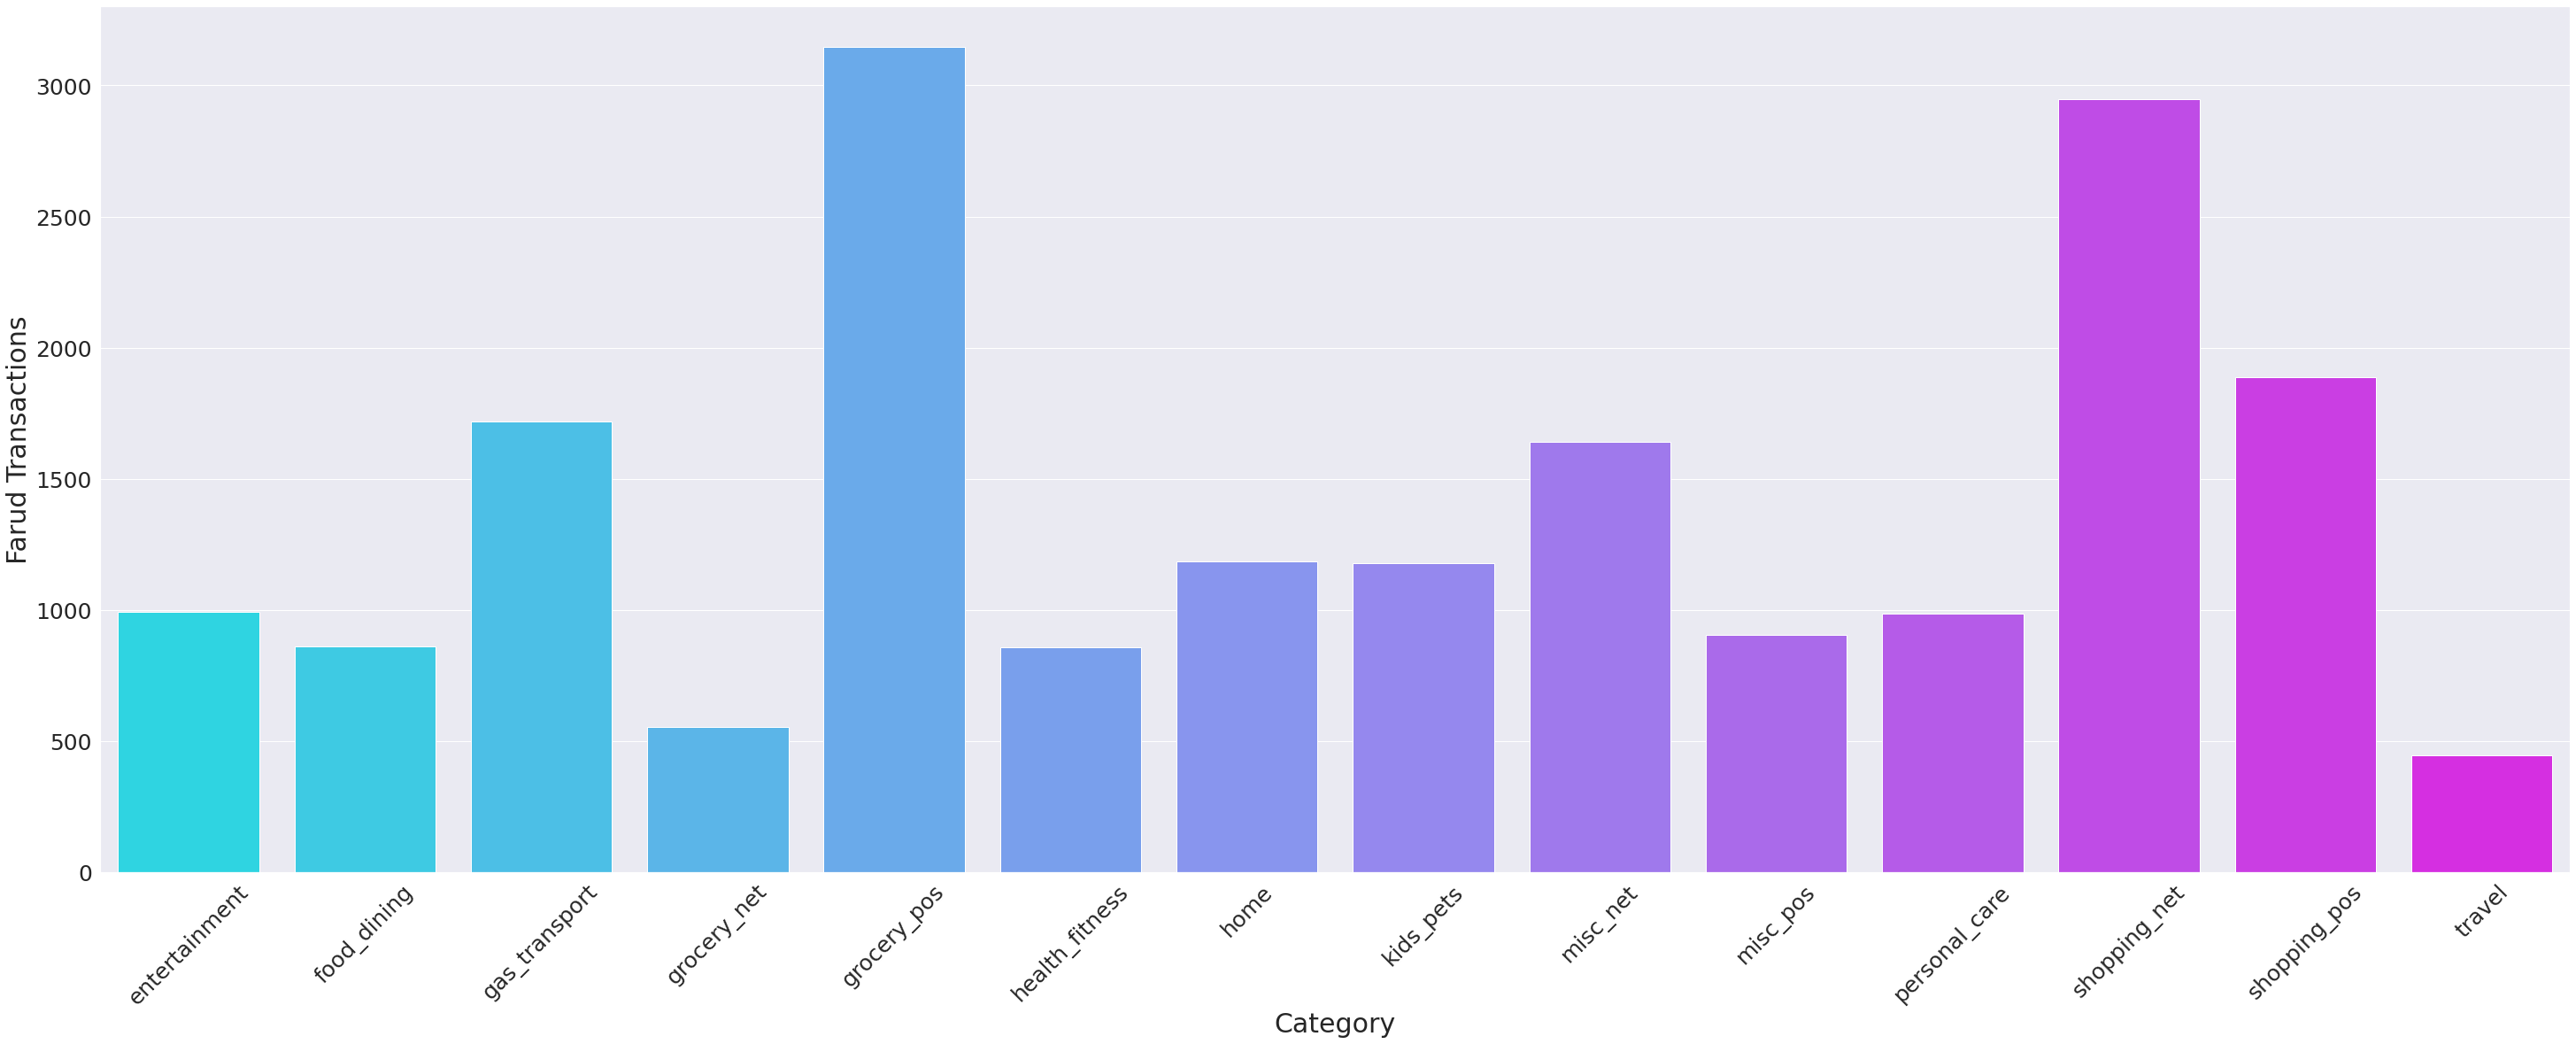

In [ ]:
data_cat = normalized_df[['category','is_fraud']].groupby(['category']).count().reset_index()
data_cat.columns = ['category','is_fraud_count']
data_cat


from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
figure(figsize=(50,18), facecolor='w', edgecolor='r')
sns.barplot(x="category", y = "is_fraud_count" , data = data_cat,palette='cool')
plt.xticks(rotation=45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Category',fontsize=30)
plt.ylabel('Farud Transactions', fontsize=30)
plt.show()

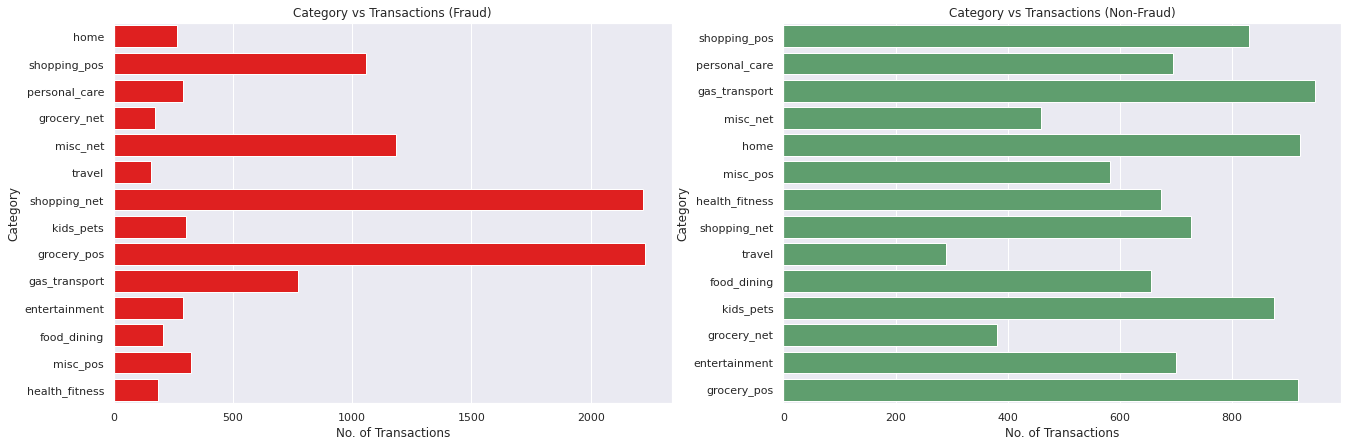

In [ ]:
plt.figure(figsize=(22,7))

plt.subplot(1,2,1)
sb.countplot(y=fraud_df['category'],color='red')
plt.title('Category vs Transactions (Fraud)')
plt.xlabel('No. of Transactions')
plt.ylabel('Category')

plt.subplot(1,2,2)
sb.countplot(y=non_fraud_df['category'],color='g')
plt.title('Category vs Transactions (Non-Fraud)')
plt.xlabel('No. of Transactions')
plt.ylabel('Category')

plt.show()


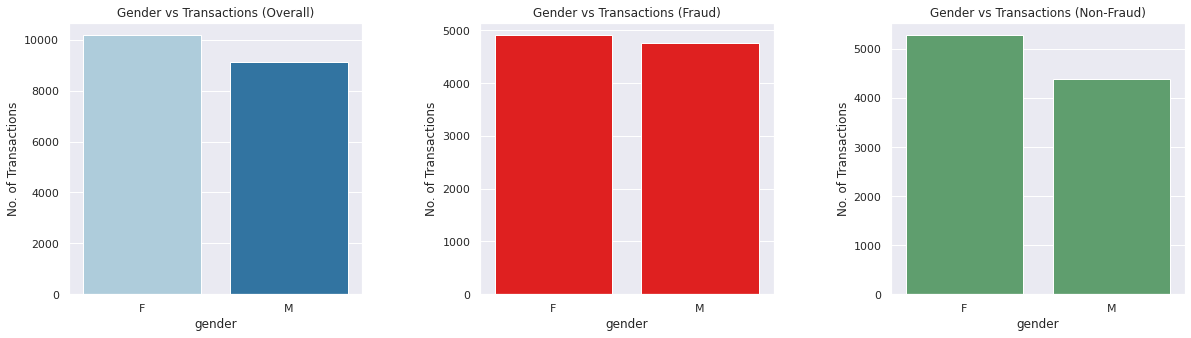

In [ ]:
plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace = 0.4)

plt.subplot(1,3,1)
sb.countplot(x=normalized_df['gender'],palette='Paired')
plt.title('Gender vs Transactions (Overall)')
plt.ylabel('No. of Transactions')

plt.subplot(1,3,2)
sb.countplot(x=fraud_df['gender'],color='red');
plt.title('Gender vs Transactions (Fraud)')
plt.ylabel('No. of Transactions')

plt.subplot(1,3,3)
sb.countplot(x=non_fraud_df['gender'],color='g');
plt.title('Gender vs Transactions (Non-Fraud)')
plt.ylabel('No. of Transactions')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


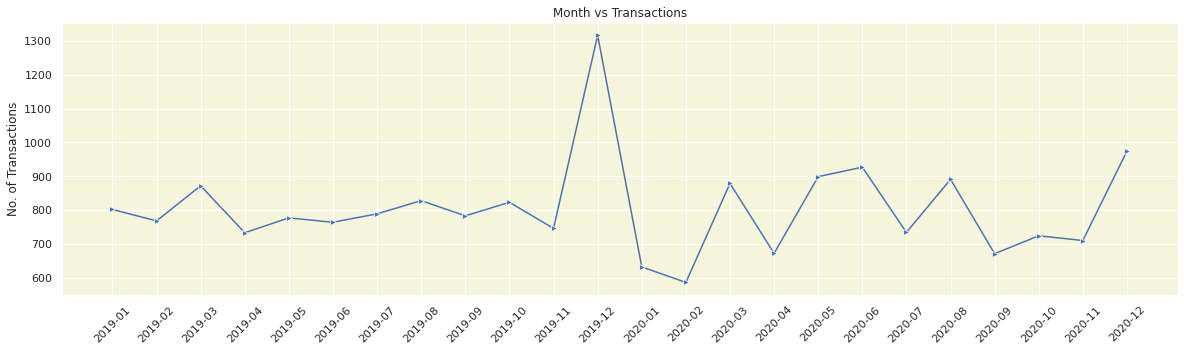

In [ ]:
normalized_df['year_month'] = normalized_df['trans_date_trans_time'].dt.to_period('M')
Month_Transactions = normalized_df.groupby(normalized_df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
Month_Transactions.columns = ['year_month','num_of_transactions','customers']
x = np.arange(0,len(Month_Transactions),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
sb.lineplot(x=x,y=Month_Transactions['num_of_transactions'],ax=ax,marker=">")
ax.set_xticks(x)
ax.set_xticklabels(Month_Transactions['year_month'],rotation=45)
ax.set_facecolor('#F5F5DC')
ax.set_ylabel('No. of Transactions')
plt.title('Month vs Transactions')
plt.show()

In [ ]:
fraud_df['year_month'] = fraud_df['trans_date_trans_time'].dt.to_period('M')
Fraud_Transactions = fraud_df.groupby(fraud_df['year_month'])[['trans_num','cc_num']].nunique().reset_index()
Fraud_Transactions.columns = ['year_month','num_of_transactions','customers']
x = np.arange(0,len(Fraud_Transactions),1)

fig, ax = plt.subplots(1,1,figsize=(20,7))
sb.lineplot(x=x,y=Fraud_Transactions['num_of_transactions'],ax=ax,marker=">",color='red')
ax.set_xticks(x)
ax.set_xticklabels(Month_Transactions['year_month'],rotation=45)
ax.set_facecolor('lightgrey')
ax.set_ylabel('No. of Fraud Transactions')
plt.title('Month vs Fraudalent Transactions')
plt.show()


KeyError: ignored

In [ ]:
import plotly.express as px
fraud_df2 = df2[df2['is_fraud'] == 1]
fig = px.scatter_mapbox(fraud_df2, lat="lat", lon="long", hover_name="city",zoom=3.5, height=500,color="is_fraud", color_discrete_map={'1':'r'})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

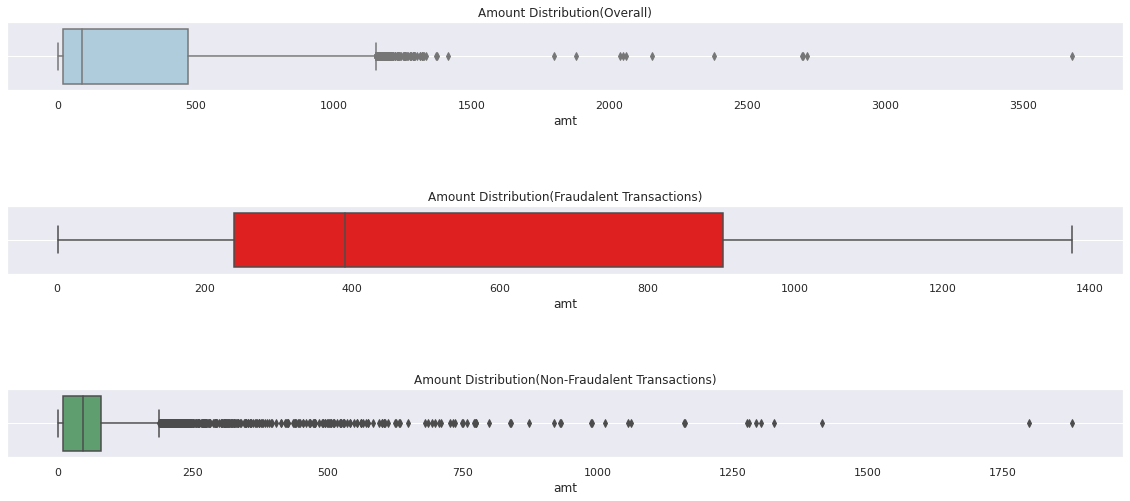

In [ ]:

plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace = 1.7)

plt.subplot(3,1,1)
sb.boxplot(x=normalized_df[normalized_df['amt']<=4000]['amt'],palette='Paired',width=0.8)
plt.title('Amount Distribution(Overall)')
plt.grid()

plt.subplot(3,1,2)
sb.boxplot(x= fraud_df[fraud_df['amt']<=2000]['amt'],color='red',width=0.8)
plt.title('Amount Distribution(Fraudalent Transactions)')
plt.grid()

plt.subplot(3,1,3)
sb.boxplot(x= non_fraud_df[non_fraud_df['amt']<=2000]['amt'],color='g',width=0.8)
plt.title('Amount Distribution(Non-Fraudalent Transactions)')
plt.grid()

plt.show()


## **Statistics**

In [ ]:
mu = normalized_df['amt'].mean()
var = normalized_df['amt'].var()
std = normalized_df['amt'].std()
med = normalized_df['amt'].median()
ndf_max = normalized_df['amt'].max()
ndf_min = normalized_df['amt'].min()
print("Statistics of Amount ")
print('Mean : ',mu)
print('Variance : ',var)
print('Standard Devaiation : ',std)
print("Median : ",med)
print('Maximum : ',ndf_max)
print('Mininum : ',ndf_min)


Statistics of Amount 
Mean :  298.939573619317
Variance :  138210.0887520932
Standard Devaiation :  371.766174835868
Median :  87.49000000000001
Maximum :  4399.61
Mininum :  1.01


In [ ]:
ft_mu = fraud_df['amt'].mean()
ft_var = fraud_df['amt'].var()
ft_std = fraud_df['amt'].std()
ft_med = fraud_df['amt'].median()
ft_max = fraud_df['amt'].max()
ft_min = fraud_df['amt'].min()
print("Statistics of Amount for Fraudalent Transaction ")
print('Mean : ',ft_mu)
print('Variance : ',ft_var)
print('Standard Devaiation : ',ft_std)
print("Median : ",ft_med)
print('Maximum : ',ft_max)
print('Minimum : ',ft_min)

Statistics of Amount for Fraudalent Transaction 
Mean :  530.6614122888819
Variance :  152903.57930145616
Standard Devaiation :  391.0288727210002
Median :  390.0
Maximum :  1376.04
Minimum :  1.06


In [ ]:
nft_mu = non_fraud_df['amt'].mean()
nft_var = non_fraud_df['amt'].var()
nft_std = non_fraud_df['amt'].std()
nft_med = non_fraud_df['amt'].median()
nft_max = non_fraud_df['amt'].max()
nft_min = non_fraud_df['amt'].min()
print("Statistics of Amount for Non - Fraudalent Transaction ")
print('Mean : ',nft_mu)
print('Variance : ',nft_var)
print('Standard Deviation : ',nft_std)
print("Median : ",nft_med)
print('Maximum : ',nft_max)
print('Minimum : ',nft_min)

Statistics of Amount for Non - Fraudalent Transaction 
Mean :  67.21773494974602
Variance :  16129.77095932496
Standard Deviation :  127.0030352366626
Median :  46.96
Maximum :  4399.61
Minimum :  1.01


In [ ]:
data_gender = normalized_df[['gender','trans_num']].groupby(['gender']).count().reset_index()
data_gender.columns = ['Gender','gender_count']
data_gender['gender_percentage'] = (data_gender['gender_count']/data_gender['gender_count'].sum())*100
data_fraud_gender = normalized_df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
data_fraud_gender.columns = ['Gender','is_fraud','count']
data_fraud_gender = data_fraud_gender.merge(data_gender[['Gender','gender_count']],how='inner',left_on='Gender',right_on='Gender')
data_fraud_gender['percent_grp'] = (data_fraud_gender['count']/data_fraud_gender['gender_count'])*100
data_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,5269,10168,51.819434
1,F,1,4899,10168,48.180566
2,M,0,4382,9134,47.974600
3,M,1,4752,9134,52.025400


In [ ]:
data_category = normalized_df[['category','trans_num']].groupby(['category']).count().reset_index()
data_category.columns = ['Category','category_count']
data_category['percent'] = (data_category['category_count']/data_category['category_count'].sum())*100
data_fraud_category = normalized_df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
data_fraud_category.columns = ['Category','is_fraud','count']
data_fraud_category = data_fraud_category.merge(data_category[['Category','category_count','percent']],how='inner',left_on='Category',right_on='Category')
data_fraud_category['percent_grp'] = (data_fraud_category['count']/data_fraud_category['category_count'])*100
data_fraud_percent=data_fraud_category[data_fraud_category['is_fraud'] == 1]
data_fraud_percent.reset_index(inplace=True)
data_fraud_percent.iloc[:,1:]

,Category,is_fraud,count,category_count,percent,percent_grp
0,entertainment,1,292,992,5.139364,29.435484
1,food_dining,1,205,860,4.455497,23.837209
2,gas_transport,1,772,1719,8.905813,44.909831
3,grocery_net,1,175,555,2.875350,31.531532
4,grocery_pos,1,2228,3146,16.298829,70.820089
5,health_fitness,1,185,858,4.445135,21.561772
6,home,1,265,1186,6.144441,22.344013
7,kids_pets,1,304,1178,6.102995,25.806452
8,misc_net,1,1182,1641,8.501710,72.029250
9,misc_pos,1,322,904,4.683452,35.619469


In [ ]:
data_merchant = normalized_df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
data_merchant.columns = ['Merchant','merchant_count']
data_merchant['percent'] = (data_merchant['merchant_count']/data_merchant['merchant_count'].sum())*100
data_fraud_merchant = normalized_df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
data_fraud_merchant.columns = ['Merchant','is_fraud','count']
data_fraud_merchant = data_fraud_merchant.merge(data_merchant[['Merchant','merchant_count','percent']],how='inner',left_on='Merchant',right_on='Merchant')
data_fraud_merchant['percent_grp'] = (data_fraud_merchant['count']/data_fraud_merchant['merchant_count'])*100
data_fraud_merchant = data_fraud_merchant[data_fraud_merchant['is_fraud'] == 1]
data_fraud_merchant.reset_index(inplace=True)
data_fraud_merchant.iloc[:,1:]

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
0,fraud_Abbott-Rogahn,1,4,13,0.067351,30.769231
1,fraud_Abbott-Steuber,1,8,18,0.093255,44.444444
2,fraud_Abernathy and Sons,1,4,21,0.108797,19.047619
3,fraud_Abshire PLC,1,9,24,0.124339,37.500000
4,"fraud_Adams, Kovacek and Kuhlman",1,5,14,0.072531,35.714286
...,...,...,...,...,...,...
680,fraud_Zemlak Group,1,24,33,0.170967,72.727273
681,"fraud_Zemlak, Tillman and Cremin",1,3,13,0.067351,23.076923
682,fraud_Ziemann-Waters,1,10,26,0.134701,38.461538
683,"fraud_Zieme, Bode and Dooley",1,10,24,0.124339,41.666667


In [ ]:
print("Skewness of Fraud, Non-Fraud : ",normalized_df['is_fraud'].skew()) #symmetric

print("Skewness of Amount : ",normalized_df['amt'].skew()) #highlyskewed

Skewness of Fraud, Non-Fraud :  0.0
Skewness of Amount :  1.220188552301356


In [ ]:
print("Kurtosis of Amount : ",normalized_df['amt'].kurt())

Kurtosis of Amount :  1.0444648163012644


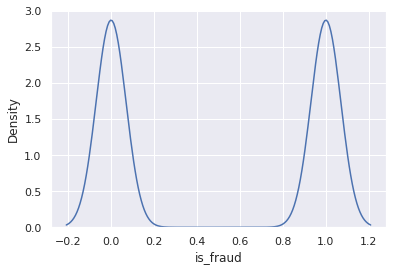

In [ ]:
sb.kdeplot(normalized_df['is_fraud'])
plt.show()

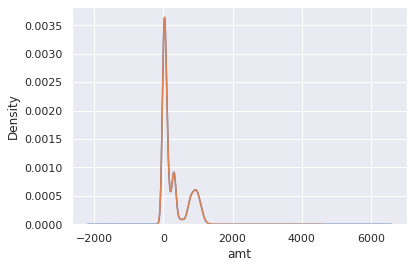

In [ ]:
normalized_df['amt'].plot(kind='density')
sb.kdeplot(normalized_df['amt'])
plt.show()

# **Hypothesis Testing**

In [ ]:
df.drop(['trans_num','job','dob','trans_date_trans_time','city',],axis=1,inplace=True)

In [ ]:
df

,cc_num,merchant,category,amt,gender,state,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,SC,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,UT,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,NY,0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,FL,0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,MI,0
...,...,...,...,...,...,...,...
1852390,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,UT,0
1852391,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,MD,0
1852392,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,NM,0
1852393,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,SD,0


In [ ]:
df.dtypes


cc_num        int64
merchant     object
category     object
amt         float64
gender       object
state        object
is_fraud      int64
dtype: object

In [ ]:
shuffled_df = df.sample(frac=1,random_state=4)
fraud_df = shuffled_df.loc[shuffled_df['is_fraud'] == 1]
non_fraud_df = shuffled_df.loc[shuffled_df['is_fraud'] == 0].sample(n=9651,random_state=42)
normalized_df = pd.concat([fraud_df, non_fraud_df])

In [ ]:
normalized_df.reset_index(inplace=True)
df = normalized_df.iloc[:,1:]
df

,cc_num,merchant,category,amt,gender,state,is_fraud
0,4450831335606294,fraud_Lynch-Wisozk,home,290.62,F,OK,1
1,4917187576956394,fraud_Kris-Padberg,shopping_pos,841.98,M,OK,1
2,6011393492413821,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,F,CA,1
3,581508178315,fraud_Zulauf LLC,personal_care,18.60,M,TX,1
4,30487648872433,fraud_Rowe-Vandervort,grocery_net,12.55,F,IN,1
...,...,...,...,...,...,...,...
19297,3502088871723054,fraud_Schmeler-Howe,personal_care,67.86,M,MD,0
19298,4653879239169997,fraud_Reynolds-Schinner,misc_pos,1.44,F,KY,0
19299,180047222886866,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,F,IL,0
19300,4220345354880,fraud_Block-Hauck,travel,2.01,M,MI,0


In [ ]:
df['gender']=df['gender'].map(lambda a : 0 if a == 'M' else 1)
## Male is 0 F is 1

In [ ]:
df.nunique()

cc_num        999
merchant      693
category       14
amt         13963
gender          2
state          51
is_fraud        2
dtype: int64

In [ ]:
df

,cc_num,merchant,category,amt,gender,state,is_fraud
0,4450831335606294,fraud_Lynch-Wisozk,home,290.62,1,OK,1
1,4917187576956394,fraud_Kris-Padberg,shopping_pos,841.98,0,OK,1
2,6011393492413821,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,1,CA,1
3,581508178315,fraud_Zulauf LLC,personal_care,18.60,0,TX,1
4,30487648872433,fraud_Rowe-Vandervort,grocery_net,12.55,1,IN,1
...,...,...,...,...,...,...,...
19297,3502088871723054,fraud_Schmeler-Howe,personal_care,67.86,0,MD,0
19298,4653879239169997,fraud_Reynolds-Schinner,misc_pos,1.44,1,KY,0
19299,180047222886866,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,1,IL,0
19300,4220345354880,fraud_Block-Hauck,travel,2.01,0,MI,0


In [ ]:
df3 = df.copy()

In [ ]:
df3

,cc_num,merchant,category,amt,gender,state,is_fraud
0,4450831335606294,fraud_Lynch-Wisozk,home,290.62,1,OK,1
1,4917187576956394,fraud_Kris-Padberg,shopping_pos,841.98,0,OK,1
2,6011393492413821,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,932.02,1,CA,1
3,581508178315,fraud_Zulauf LLC,personal_care,18.60,0,TX,1
4,30487648872433,fraud_Rowe-Vandervort,grocery_net,12.55,1,IN,1
...,...,...,...,...,...,...,...
19297,3502088871723054,fraud_Schmeler-Howe,personal_care,67.86,0,MD,0
19298,4653879239169997,fraud_Reynolds-Schinner,misc_pos,1.44,1,KY,0
19299,180047222886866,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.45,1,IL,0
19300,4220345354880,fraud_Block-Hauck,travel,2.01,0,MI,0


Null Hypothesis : The Transaction is fine and non-fraudalent   
Alternate Hypothesis : The Transaction is Not fine and its fraudalent

###**Chi-square Test**

In [ ]:
x = pd.crosstab(df3['category'],df3['is_fraud'])
x

is_fraud,0,1
category,,
entertainment,700,292
food_dining,655,205
gas_transport,947,772
grocery_net,380,175
grocery_pos,918,2228
health_fitness,673,185
home,921,265
kids_pets,874,304
misc_net,459,1182


In [ ]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(x)
print("The degree of freedom is: ", dof)
print('stat=%.2f, p-value=%.2f' % (stat,p))

The degree of freedom is:  13
stat=3341.31, p-value=0.00


In [ ]:
prob = 0.95
alpha = 1.0 - prob
print('The alpha/significance level = %.3f' % alpha)
print('The p-value is = %.2f' % p)
if p <= alpha:
  print('Reject the Null Hypothesis (Reject H0) as the variables are dependent')
else:
  print('Accept the Null Hypothesis (Do not reject H0) as the variables are independent')

The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0) as the variables are dependent


###**z-test**

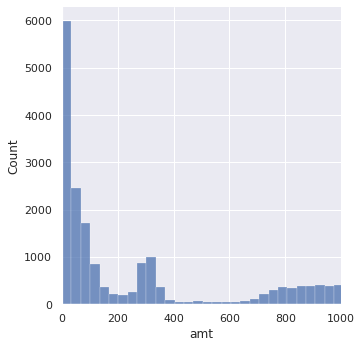

In [ ]:
sb.displot(df3['amt'])
plt.xlim([0,1000])
plt.show()

Null Hypothesis :  less than or equal to the mean population value.

In [ ]:
print("The Population Mean is : ",df3['amt'].mean())
print("The Population Standard Deviation is : ",df3['amt'].std())
x = df3['amt'].iloc[:40]
print("The Sample Size is : ",len(x))
print("The Sample Mean is : ",x.mean())


The Population Mean is :  298.939573619317
The Population Standard Deviation is :  371.766174835868
The Sample Size is :  40
The Sample Mean is :  543.8027500000001


# **One Hot Encoding and Feature Selection**

In [ ]:
state=pd.get_dummies(df.state)
merged=pd.concat([df,state],axis='columns')
df=merged.drop(['state','OK'],axis=1)

In [ ]:
category=pd.get_dummies(df.category)
merged=pd.concat([df,category],axis='columns')
df=merged.drop(['category','home'],axis=1)
df.shape

(19302, 68)

In [ ]:
df['merchant'] = df['merchant'].astype(str)
df.dtypes

cc_num             int64
merchant          object
amt              float64
gender             int64
is_fraud           int64
                  ...   
misc_pos           uint8
personal_care      uint8
shopping_net       uint8
shopping_pos       uint8
travel             uint8
Length: 68, dtype: object

In [ ]:
df.merchant.value_counts().sort_values(ascending= False).head(60)

fraud_Kilback LLC                             90
fraud_Boyer PLC                               85
fraud_Rau and Sons                            82
fraud_Cormier LLC                             82
fraud_Schultz, Simonis and Little             80
fraud_Romaguera, Cruickshank and Greenholt    78
fraud_Doyle Ltd                               77
fraud_Kuhn LLC                                76
fraud_Kozey-Boehm                             75
fraud_Terry-Huel                              75
fraud_Huel, Hammes and Witting                73
fraud_Heathcote, Yost and Kertzmann           72
fraud_Goldner, Kovacek and Abbott             71
fraud_Stracke-Lemke                           71
fraud_Strosin-Cruickshank                     71
fraud_Koepp-Witting                           70
fraud_Moen, Reinger and Murphy                70
fraud_Kiehn-Emmerich                          69
fraud_Boyer-Reichert                          69
fraud_McDermott-Weimann                       68
fraud_Padberg-Welch 

In [ ]:
top_60= [x for x in df.merchant.value_counts().sort_values(ascending= False).head(60).index]

In [ ]:
for label in top_60:
  df[label] = np.where(df['merchant']==label,1,0)

In [ ]:
df.shape

(19302, 128)

In [ ]:
df.drop(['merchant'],axis=1,inplace=True)

In [ ]:
df

,cc_num,amt,gender,is_fraud,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,...,fraud_Padberg-Welch,fraud_Kiehn Inc,"fraud_Schmeler, Bashirian and Price",fraud_Vandervort-Funk,fraud_Goyette Inc,fraud_Schumm PLC,fraud_Murray-Smitham,"fraud_Lockman, West and Runte",fraud_Fisher-Schowalter,fraud_Lemke-Gutmann,"fraud_Mosciski, Ziemann and Farrell",fraud_Lockman Ltd,fraud_Miller-Hauck,fraud_Kunze Inc,fraud_Heidenreich PLC,fraud_Gleason-Macejkovic,fraud_Kuhic LLC,"fraud_Gottlieb, Considine and Schultz","fraud_Langworth, Boehm and Gulgowski","fraud_Osinski, Ledner and Leuschke","fraud_Kovacek, Dibbert and Ondricka","fraud_Greenholt, O'Hara and Balistreri",fraud_Wolf Inc,"fraud_Mosciski, Gislason and Mertz",fraud_Kerluke-Abshire,"fraud_Labadie, Treutel and Bode",fraud_Rempel Inc,"fraud_Schoen, Kuphal and Nitzsche",fraud_Bradtke PLC,"fraud_Casper, Hand and Zulauf",fraud_Bailey-Morar,fraud_Heathcote LLC,fraud_Kutch and Sons,fraud_Price Inc,fraud_Hudson-Ratke,"fraud_Stanton, Jakubowski and Baumbach",fraud_Jast Ltd,fraud_Medhurst PLC,"fraud_Kuhic, Bins and Pfeffer",fraud_Schmidt and Sons
0,4450831335606294,290.62,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4917187576956394,841.98,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6011393492413821,932.02,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,581508178315,18.60,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30487648872433,12.55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,3502088871723054,67.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19298,4653879239169997,1.44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19299,180047222886866,1.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19300,4220345354880,2.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
col = df.pop('is_fraud')
df.insert(126,'is_fraud',col,allow_duplicates=False)
df

,cc_num,amt,gender,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OR,...,fraud_Kiehn Inc,"fraud_Schmeler, Bashirian and Price",fraud_Vandervort-Funk,fraud_Goyette Inc,fraud_Schumm PLC,fraud_Murray-Smitham,"fraud_Lockman, West and Runte",fraud_Fisher-Schowalter,fraud_Lemke-Gutmann,"fraud_Mosciski, Ziemann and Farrell",fraud_Lockman Ltd,fraud_Miller-Hauck,fraud_Kunze Inc,fraud_Heidenreich PLC,fraud_Gleason-Macejkovic,fraud_Kuhic LLC,"fraud_Gottlieb, Considine and Schultz","fraud_Langworth, Boehm and Gulgowski","fraud_Osinski, Ledner and Leuschke","fraud_Kovacek, Dibbert and Ondricka","fraud_Greenholt, O'Hara and Balistreri",fraud_Wolf Inc,"fraud_Mosciski, Gislason and Mertz",fraud_Kerluke-Abshire,"fraud_Labadie, Treutel and Bode",fraud_Rempel Inc,"fraud_Schoen, Kuphal and Nitzsche",fraud_Bradtke PLC,"fraud_Casper, Hand and Zulauf",fraud_Bailey-Morar,fraud_Heathcote LLC,fraud_Kutch and Sons,fraud_Price Inc,fraud_Hudson-Ratke,"fraud_Stanton, Jakubowski and Baumbach",fraud_Jast Ltd,fraud_Medhurst PLC,"fraud_Kuhic, Bins and Pfeffer",fraud_Schmidt and Sons,is_fraud
0,4450831335606294,290.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4917187576956394,841.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,6011393492413821,932.02,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,581508178315,18.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,30487648872433,12.55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,3502088871723054,67.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19298,4653879239169997,1.44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19299,180047222886866,1.45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19300,4220345354880,2.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
from  sklearn.model_selection import train_test_split
x_train ,x_test , y_train, y_test = train_test_split (x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train[:,0:2]= sc.fit_transform(x_train[:,0:2])
x_test[:,0:2]= sc.transform(x_test[:,0:2])

In [ ]:
print(x)

[[4.45083134e+15 2.90620000e+02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.91718758e+15 8.41980000e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.01139349e+15 9.32020000e+02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.80047223e+14 1.45000000e+00 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.22034535e+12 2.01000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.24873535e+15 2.82000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

Confusion Matrix : 
[[1647  243]
 [ 224 1747]]


In [ ]:
print("The Accuracy Score of KNN Model is : ",accuracy_score(y_test, y_pred))

The Accuracy Score of KNN Model is :  0.8790468790468791


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1890
           1       0.88      0.89      0.88      1971

    accuracy                           0.88      3861
   macro avg       0.88      0.88      0.88      3861
weighted avg       0.88      0.88      0.88      3861



## **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import  accuracy_score, classification_report
print("The Accuracy Score of Decision Tree Model is : ",accuracy_score(y_test, y_pred))

The Accuracy Score of Decision Tree Model is :  0.952084952084952


## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(random_state = 0)
regressor.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [ ]:
y_pred = regressor.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("The Accuracy Score of Logistic Regression Model is : ",accuracy_score(y_test,y_pred))

The Accuracy Score of Logistic Regression Model is :  0.8192178192178192


## **SVM**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The Accuracy Score of SVM Model is : ",accuracy_score(y_test, y_pred))

[[1818   72]
 [ 464 1507]]
The Accuracy Score of SVM Model is :  0.8611758611758612


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The Accuracy Score of Random Forest Model is : ",accuracy_score(y_test, y_pred))

[[1818   72]
 [ 124 1847]]
The Accuracy Score of Random Forest Model is :  0.9492359492359492


## **Kernal PCA**

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
x_train_kpca = kpca.fit_transform(x_train)
x_test_kpca = kpca.transform(x_test)

##**XGBoost**

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1813   77]
 [ 126 1845]]


0.9474229474229474

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.90 %
Standard Deviation: 0.59 %


#**Deep Learning**

In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=40, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 400)

Epoch 1/400


ValueError: ignored

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

# **Conclusion**

In [ ]:
import matplotlib
import six

data = pd.DataFrame()
data['ML Algorithms'] = ["KNN","XGBoost","SVM","Decision Tree","Logistic Regression","Random Forest"]
data['Precision(%)'] = [99.88,73.25,66.34,17.67,12.89,12.14]
data['Recall(%)'] = [99.88,73.25,66.34,17.67,12.89,12.14]
data['F1(%)'] = [99.88,73.25,66.34,17.67,12.89,12.14]

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=12,header_color='#797EF6', row_colors=['#f1f1f2', 'w'], edge_color='w', bbox=[0, 0, 1, 1], header_columns=0,ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

def get_table(ax):
    table = None
    for child in ax.get_children():
        if isinstance(child, matplotlib.table.Table):
            table = child
            return table
    return table

def set_row_edge_color(ax, row, color):
    table = get_table(ax)
    for k, cell in  six.iteritems(table._cells):
        if (k[0] == row):
            cell.set_edgecolor(color)

ax = render_mpl_table(data, header_columns=0, col_width=2.0)
for i in range (0,len(data['ML Algorithms'])+1):
  set_row_edge_color(ax, i, 'k')
plt.show()